In [26]:
import csv 
import matplotlib.pyplot as plt
import pandas as pd
from urllib.parse import urlparse
from groq import Groq

with open('../../dataset/checkpoint_links_list.csv', 'r') as file:
	internal_links = csv.reader(file)
	internal_links = list(internal_links)

len(internal_links)
internal_links = [url[0] for url in internal_links[1:]]

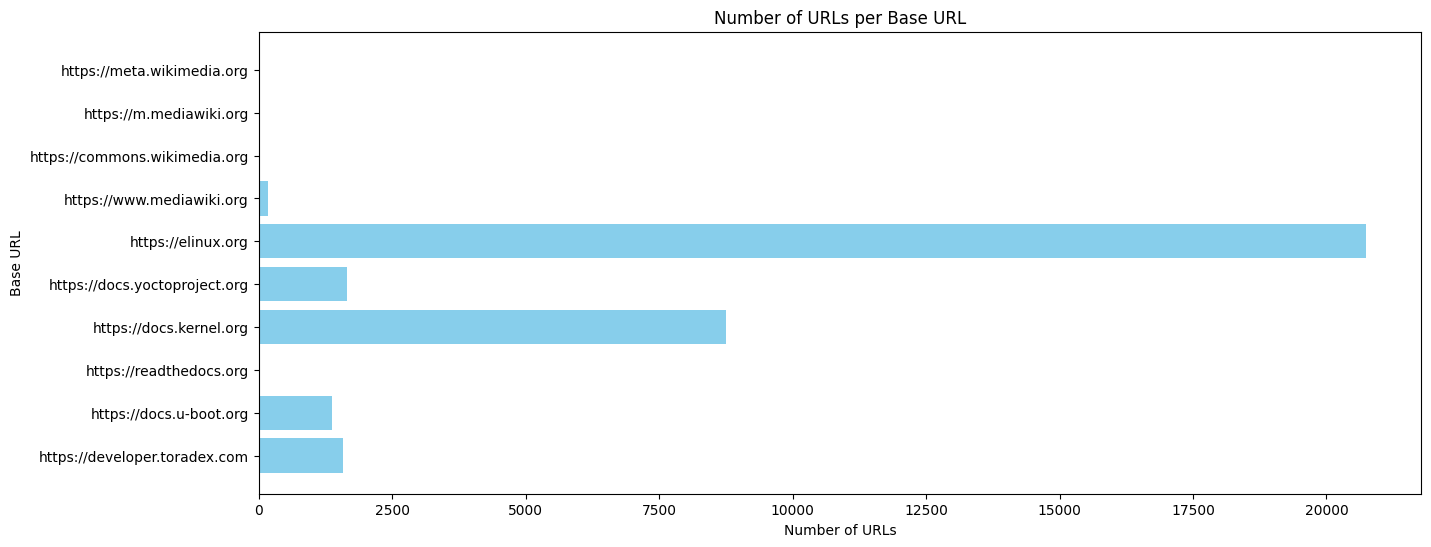

In [18]:
# Initialize a dictionary to count the URLs for each base URL
base_url_counts = {}

for url in internal_links:
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    if base_url in base_url_counts:
        base_url_counts[base_url] += 1
    else:
        base_url_counts[base_url] = 1

# Convert to DataFrame for easy plotting
url_counts_df = pd.DataFrame(list(base_url_counts.items()), columns=['Base URL', 'URL Count'])

# Plot the URL counts
plt.figure(figsize=(15, 6))
plt.barh(url_counts_df['Base URL'], url_counts_df['URL Count'], color='skyblue')
plt.xlabel('Number of URLs')
plt.ylabel('Base URL')
plt.title('Number of URLs per Base URL')
plt.savefig('../../url_counts.png', format='png')
plt.show()


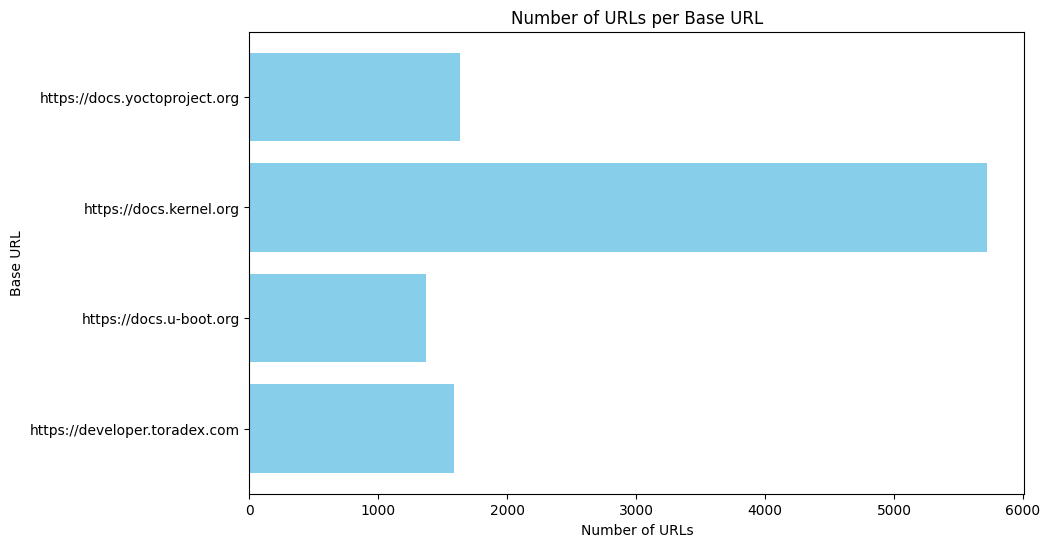

The cleaned URLs have been saved to 'cleaned_urls.json'.


In [37]:
# List of base URLs to keep
base_urls = [
    'https://developer.toradex.com',
    'https://docs.u-boot.org',
    'https://docs.kernel.org',
    'https://docs.yoctoproject.org'
]

filter_words = ['login', 'maintainers', 'user']

# Filter out URLs based on the specified conditions
cleaned_urls = []
for url in internal_links:
    # Check if the URL contains a heading reference
    if '#' in url:
        base_url = url.split('#')[0]
    else:
        base_url = url

    # Check if the base URL starts with one of the allowed base URLs
    if not any(base_url.startswith(bu) for bu in base_urls):
        continue

    # Check if the URL contains any of the filter words
    if any(word in url.lower() for word in filter_words):
        continue

    # If all checks pass, add the URL to the cleaned list
    cleaned_urls.append(url)

# Count the number of URLs for each base URL
base_url_counts = {}
for url in cleaned_urls:
    parsed_url = urlparse(url)
    base_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    if base_url in base_url_counts:
        base_url_counts[base_url] += 1
    else:
        base_url_counts[base_url] = 1

# Convert to DataFrame for easy plotting
url_counts_df = pd.DataFrame(list(base_url_counts.items()), columns=['Base URL', 'URL Count'])

# Plot the URL counts
plt.figure(figsize=(10, 6))
plt.barh(url_counts_df['Base URL'], url_counts_df['URL Count'], color='skyblue')
plt.xlabel('Number of URLs')
plt.ylabel('Base URL')
plt.title('Number of URLs per Base URL')
plt.savefig('../../cleaned_url_counts.png', format='png')
plt.show()

# Display the cleaned list of URLs
cleaned_urls_df = pd.DataFrame(cleaned_urls, columns=['Cleaned URLs'])
cleaned_urls_df.to_json('../../dataset/filtered_urls.json', orient='records', lines=True)

# Print a message indicating the file has been saved
print("The cleaned URLs have been saved to 'cleaned_urls.json'.")